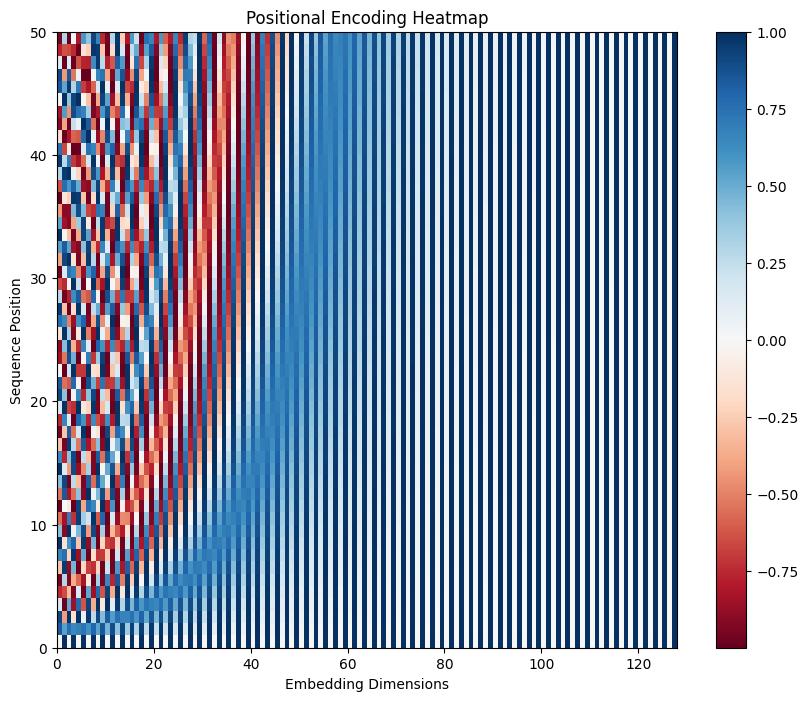

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute positional encoding
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # Shape: (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]  # Shape: (1, d_model)

    # Apply the sinusoidal functions (sin and cos)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates

    # Apply sin to even indices (2i) and cos to odd indices (2i+1)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # Apply sin to even indices
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # Apply cos to odd indices

    return angle_rads

# Parameters
seq_len = 50  # Length of the sequence (e.g., sentence length)
d_model = 128  # Dimension of the model (embedding size)

# Compute the positional encoding
pos_enc = positional_encoding(seq_len, d_model)

# Plotting the positional encoding
plt.figure(figsize=(10, 8))
plt.pcolormesh(pos_enc, cmap='RdBu')
plt.colorbar()
plt.title("Positional Encoding Heatmap")
plt.xlabel('Embedding Dimensions')
plt.ylabel('Sequence Position')
plt.show()



### **Explanation:**
1. **Positional Encoding Calculation:**
   - **`pos`**: Sequence positions from 0 to `seq_len-1`.
   - **`i`**: The dimensions for the embedding (each word embedding has its own position).
   - The formula divides by \( 10000^{2i/d} \), scales the position, and then applies `sin` to even indices and `cos` to odd indices.

2. **Plotting:**  
   The resulting positional encodings are visualized as a heatmap. The x-axis represents the embedding dimensions, and the y-axis represents the sequence positions. You can clearly see how different positions have unique encoding patterns.


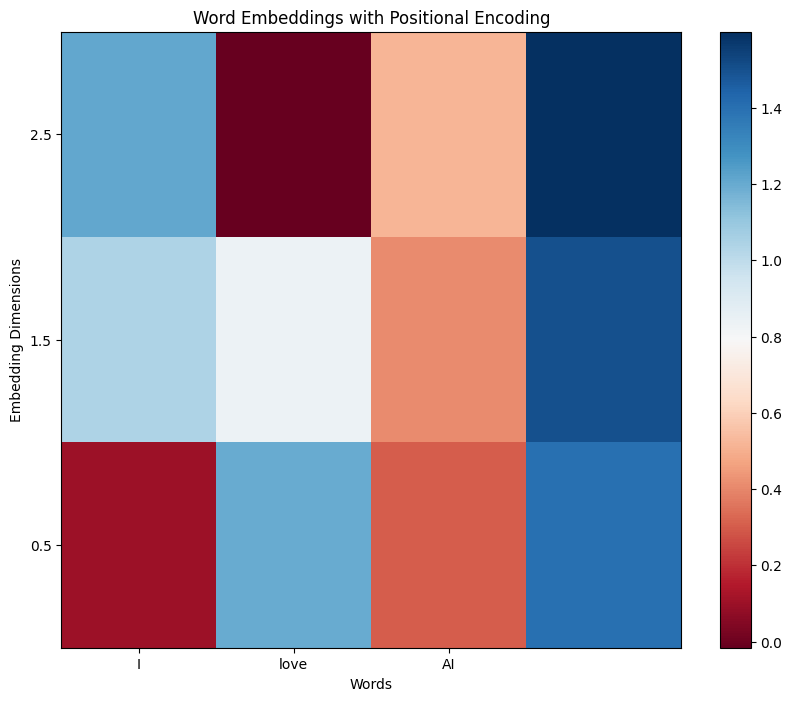

Word: I, Word Embedding with Positional Encoding: [0.1 1.2 0.3 1.4]
Word: love, Word Embedding with Positional Encoding: [1.04147098 0.84030231 0.40999983 1.49995   ]
Word: AI, Word Embedding with Positional Encoding: [ 1.20929743 -0.01614684  0.51999867  1.59980001]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simple word embeddings (just for illustration)
word_embeddings = {
    "I": np.array([0.1, 0.2, 0.3, 0.4]),
    "love": np.array([0.2, 0.3, 0.4, 0.5]),
    "AI": np.array([0.3, 0.4, 0.5, 0.6]),
}

# Function to compute positional encoding
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # Shape: (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]  # Shape: (1, d_model)

    # Apply the sinusoidal functions (sin and cos)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates

    # Apply sin to even indices (2i) and cos to odd indices (2i+1)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # Apply sin to even indices
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # Apply cos to odd indices

    return angle_rads

# Parameters
seq_len = len(word_embeddings)  # Number of words (sequence length)
d_model = word_embeddings["I"].shape[0]  # Dimension of word embeddings

# Compute the positional encoding
pos_enc = positional_encoding(seq_len, d_model)

# Add positional encoding to word embeddings
word_embeddings_with_pos = {}
for i, word in enumerate(word_embeddings):
    word_embeddings_with_pos[word] = word_embeddings[word] + pos_enc[i]

# Visualizing the word embeddings with positional encodings
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
words = list(word_embeddings.keys())
embedding_matrix = np.array([word_embeddings_with_pos[word] for word in words])

# Plotting the embeddings with positional encoding
ax.pcolormesh(embedding_matrix, cmap='RdBu')
ax.set_xticks(np.arange(len(words)) + 0.5)
ax.set_yticks(np.arange(d_model) + 0.5)
ax.set_xticklabels(words)
ax.set_ylabel('Embedding Dimensions')
ax.set_xlabel('Words')
plt.colorbar(ax.pcolormesh(embedding_matrix, cmap='RdBu'))
plt.title("Word Embeddings with Positional Encoding")
plt.show()

# Print word embeddings with positional encoding
for word in word_embeddings_with_pos:
    print(f"Word: {word}, Word Embedding with Positional Encoding: {word_embeddings_with_pos[word]}")


Absolutely! Let’s make it more intuitive by applying positional encoding to a real-world example—like a sentence.

Let’s consider the sentence: **"I love AI"**.

We'll walk through the process of creating word embeddings and then adding positional encodings to them. This way, we can visualize how the model learns the position of each word in the sentence.

Here's an example:

```python
import numpy as np
import matplotlib.pyplot as plt

# Simple word embeddings (just for illustration)
word_embeddings = {
    "I": np.array([0.1, 0.2, 0.3, 0.4]),
    "love": np.array([0.2, 0.3, 0.4, 0.5]),
    "AI": np.array([0.3, 0.4, 0.5, 0.6]),
}

# Function to compute positional encoding
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]  # Shape: (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]  # Shape: (1, d_model)
    
    # Apply the sinusoidal functions (sin and cos)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    
    # Apply sin to even indices (2i) and cos to odd indices (2i+1)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # Apply sin to even indices
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # Apply cos to odd indices
    
    return angle_rads

# Parameters
seq_len = len(word_embeddings)  # Number of words (sequence length)
d_model = word_embeddings["I"].shape[0]  # Dimension of word embeddings

# Compute the positional encoding
pos_enc = positional_encoding(seq_len, d_model)

# Add positional encoding to word embeddings
word_embeddings_with_pos = {}
for i, word in enumerate(word_embeddings):
    word_embeddings_with_pos[word] = word_embeddings[word] + pos_enc[i]

# Visualizing the word embeddings with positional encodings
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
words = list(word_embeddings.keys())
embedding_matrix = np.array([word_embeddings_with_pos[word] for word in words])

# Plotting the embeddings with positional encoding
ax.pcolormesh(embedding_matrix, cmap='RdBu')
ax.set_xticks(np.arange(len(words)) + 0.5)
ax.set_yticks(np.arange(d_model) + 0.5)
ax.set_xticklabels(words)
ax.set_ylabel('Embedding Dimensions')
ax.set_xlabel('Words')
plt.colorbar(ax.pcolormesh(embedding_matrix, cmap='RdBu'))
plt.title("Word Embeddings with Positional Encoding")
plt.show()

# Print word embeddings with positional encoding
for word in word_embeddings_with_pos:
    print(f"Word: {word}, Word Embedding with Positional Encoding: {word_embeddings_with_pos[word]}")
```

### **Step-by-step breakdown:**
1. **Word Embeddings:**  
   For simplicity, we use pre-made word embeddings for "I", "love", and "AI". Each word has a 4-dimensional vector, but real-world embeddings are much larger (e.g., 300-1024 dimensions).
   
2. **Positional Encoding Calculation:**  
   We compute the positional encodings for the three positions (1st word, 2nd word, 3rd word) in the sentence using the same sinusoidal approach.

3. **Adding Positional Encoding:**  
   Each word embedding is modified by adding its corresponding positional encoding vector. This gives each word not only its meaning but also information about its position in the sentence.

4. **Visualization:**  
   A heatmap is used to show the combined word embeddings and positional encodings for each word. The x-axis represents the words, and the y-axis represents the embedding dimensions. The colors show the values of the combined embeddings.

---

### **What You'll See:**
- The heatmap will show how each word's embedding changes after adding the positional encoding.
- For example, you'll see that the word **"I"** (at position 0) has its embedding modified by the first row of the positional encoding, **"love"** (at position 1) gets modified by the second row, and **"AI"** (at position 2) by the third.

---

This example should give you a clear idea of how positional encoding helps the model understand the relative position of each word in the sentence.